In [ ]:
#import libraries
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rcParams['figure.figsize']=10,6

In [ ]:
from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

# from download import download

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

print("Import Succesfull")

Import Succesfull


## CARGA DE DATOS

In [ ]:
import pandas as pd
# Carga de datos diarios
location='TIME_SERIES-Andenes_Diario-13-23.csv'
df= pd.read_csv(location, parse_dates=['Fecha'])
df['Fecha'] = pd.to_datetime(df['Fecha'])
# df.set_index('Fecha', inplace=True)
df.tail()
# df.head(5)

,Año,Mes,Dia,Fecha,Tｰ Media,TｰMaxima,TｰMinima,Lluvia,%Humedad,Evapotransp,Pto rocio,RadSolar,EnerSolar,PresionBarom
3878,2023,Ago,15,2023-08-15,10.306,18.84,3.22,0.00,62.130,3.562,2.325,206.779,11.929,658.736
3879,2023,Ago,16,2023-08-16,10.577,19.06,3.26,0.00,60.487,3.717,2.091,219.478,11.794,658.580
3880,2023,Ago,17,2023-08-17,10.377,18.62,3.20,0.12,59.871,3.651,1.846,208.025,10.961,658.449
3881,2023,Ago,18,2023-08-18,10.060,17.83,3.58,1.62,62.313,3.225,2.062,188.576,10.179,658.686
3882,2023,Ago,19,2023-08-19,9.813,18.38,2.60,0.08,62.673,3.287,2.043,195.741,10.978,659.076


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Año           3883 non-null   int64         
 1   Mes           3883 non-null   object        
 2   Dia           3883 non-null   int64         
 3   Fecha         3883 non-null   datetime64[ns]
 4   Tｰ Media      3883 non-null   float64       
 5   TｰMaxima      3883 non-null   float64       
 6   TｰMinima      3883 non-null   float64       
 7   Lluvia        3883 non-null   float64       
 8   %Humedad      3883 non-null   float64       
 9   Evapotransp   3883 non-null   float64       
 10  Pto rocio     3883 non-null   float64       
 11  RadSolar      3883 non-null   float64       
 12  EnerSolar     3883 non-null   float64       
 13  PresionBarom  3883 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 424.8+ KB


In [ ]:
df.head(2)

,Año,Mes,Dia,Fecha,Tｰ Media,TｰMaxima,TｰMinima,Lluvia,%Humedad,Evapotransp,Pto rocio,RadSolar,EnerSolar,PresionBarom
0,2013,Ene,1,2013-01-01,12.038,18.022,7.344,0.956,73.676,3.470,7.068,223.671,11.106,672.271
1,2013,Ene,2,2013-01-02,12.224,18.000,8.078,3.600,74.553,3.617,7.542,227.862,12.454,672.056


## CORRELATION

In [ ]:
df = df.drop(["Año", "Dia", "Mes" ], axis=1)

# Calcular la matriz de correlación de Pearson entre las variables climáticas
correlation_matrix = df[['Tｰ Media', 'TｰMaxima', 'TｰMinima', 'Lluvia', '%Humedad', 'Evapotransp', 'Pto rocio', 'RadSolar', 'EnerSolar', 'PresionBarom']].corr()

# Estilizar la matriz de correlación para imprimir una tabla bonita
styled_correlation_matrix = correlation_matrix.style.background_gradient(cmap='coolwarm')

# print("Matriz de correlación de Pearson:")
# print(correlation_matrix)

In [ ]:
# Mostrar la matriz de correlación estilizada
styled_correlation_matrix

,Tｰ Media,TｰMaxima,TｰMinima,Lluvia,%Humedad,Evapotransp,Pto rocio,RadSolar,EnerSolar,PresionBarom
Tｰ Media,1.000000,0.623660,0.716355,0.064327,-0.068842,0.591089,0.499293,0.631902,0.221029,-0.032179
TｰMaxima,0.623660,1.000000,-0.014127,-0.175048,-0.620732,0.806865,-0.194712,0.781025,0.220724,-0.107292
TｰMinima,0.716355,-0.014127,1.000000,0.305140,0.539921,0.032901,0.868087,0.120029,0.051419,0.030928
Lluvia,0.064327,-0.175048,0.305140,1.000000,0.435299,-0.074754,0.382969,-0.020591,0.007245,0.055706
%Humedad,-0.068842,-0.620732,0.539921,0.435299,1.000000,-0.548045,0.819066,-0.433183,-0.106970,0.151551
Evapotransp,0.591089,0.806865,0.032901,-0.074754,-0.548045,1.000000,-0.156873,0.899950,0.342159,-0.029720
Pto rocio,0.499293,-0.194712,0.868087,0.382969,0.819066,-0.156873,1.000000,-0.039332,0.004176,0.085345
RadSolar,0.631902,0.781025,0.120029,-0.020591,-0.433183,0.899950,-0.039332,1.000000,0.454869,0.028514
EnerSolar,0.221029,0.220724,0.051419,0.007245,-0.106970,0.342159,0.004176,0.454869,1.000000,0.815971
PresionBarom,-0.032179,-0.107292,0.030928,0.055706,0.151551,-0.029720,0.085345,0.028514,0.815971,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65392 (\N{HALFWIDTH KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


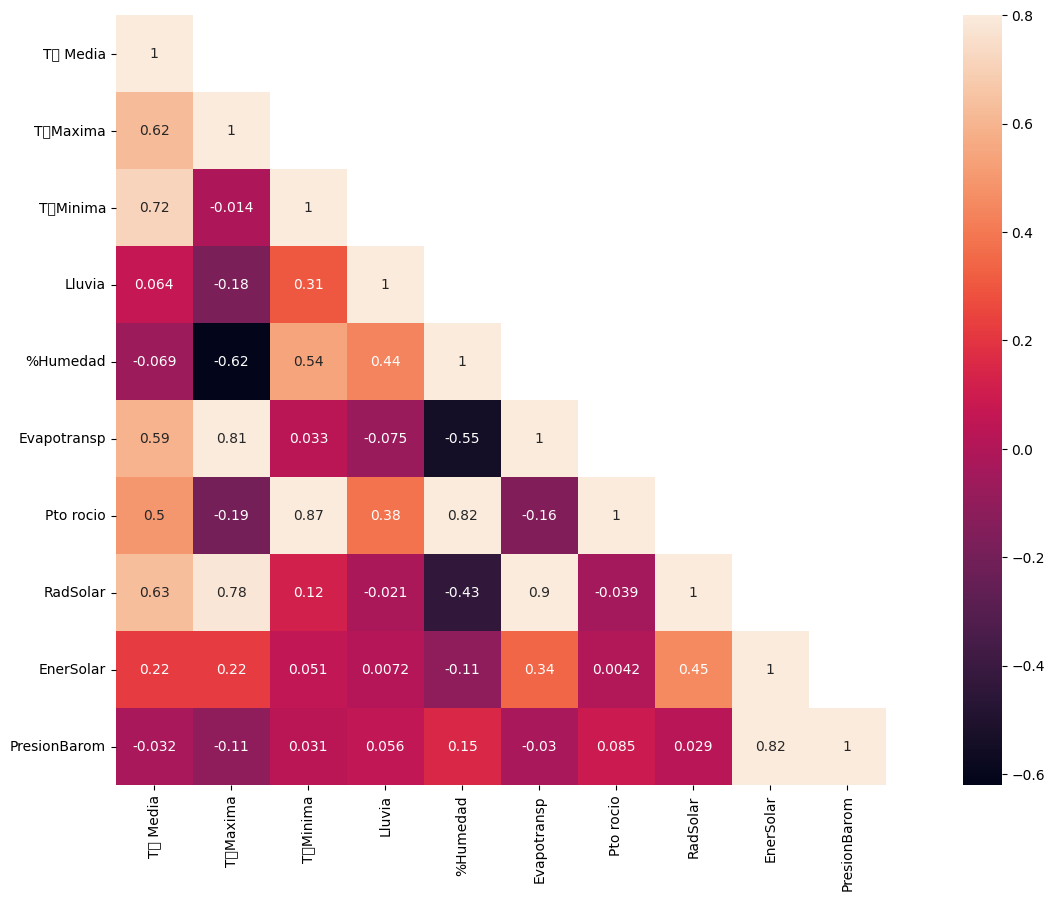

In [ ]:
# Visualizar la matriz de correlación como un mapa de calor utilizando Seaborn
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Matriz de correlación de las variables climáticas")
# plt.show()

mask= np.array(correlation_matrix)
mask[np.tril_indices_from(mask)]= False
fig, ax= plt.subplots()
fig.set_size_inches (20,10)
sns.heatmap(correlation_matrix, mask=mask, vmax=.8, square=True, annot=True)

In [ ]:
# Obtener el coeficiente de correlación de Pearson entre las variables climáticas
correlation_matrix = df[['Tｰ Media', 'TｰMaxima', 'TｰMinima', 'Lluvia', '%Humedad', 'Evapotransp', 'Pto rocio', 'RadSolar', 'EnerSolar', 'PresionBarom']].corr()
pearson_correlation = correlation_matrix['TｰMaxima']

print("\nCoeficiente de correlación de Pearson entre t_max y las demás variables:")
print(pearson_correlation)


Coeficiente de correlación de Pearson entre t_max y las demás variables:
Tｰ Media        0.623660
TｰMaxima        1.000000
TｰMinima       -0.014127
Lluvia         -0.175048
%Humedad       -0.620732
Evapotransp     0.806865
Pto rocio      -0.194712
RadSolar        0.781025
EnerSolar       0.220724
PresionBarom   -0.107292
Name: TｰMaxima, dtype: float64


In [ ]:
# Obtener el coeficiente de correlación de Pearson entre las variables climáticas
correlation_matrix = df[['Tｰ Media', 'TｰMaxima', 'TｰMinima', 'Lluvia', '%Humedad', 'Evapotransp', 'Pto rocio', 'RadSolar', 'EnerSolar', 'PresionBarom']].corr()
pearson_correlation = correlation_matrix['TｰMinima']

print("\nCoeficiente de correlación de Pearson entre t_min y las demás variables:")
print(pearson_correlation)


Coeficiente de correlación de Pearson entre t_min y las demás variables:
Tｰ Media        0.716355
TｰMaxima       -0.014127
TｰMinima        1.000000
Lluvia          0.305140
%Humedad        0.539921
Evapotransp     0.032901
Pto rocio       0.868087
RadSolar        0.120029
EnerSolar       0.051419
PresionBarom    0.030928
Name: TｰMinima, dtype: float64


In [ ]:
# Obtener el coeficiente de correlación de Pearson entre las variables climáticas
correlation_matrix = df[['Tｰ Media', 'TｰMaxima', 'TｰMinima', 'Lluvia', '%Humedad', 'Evapotransp', 'Pto rocio', 'RadSolar', 'EnerSolar', 'PresionBarom']].corr()
pearson_correlation = correlation_matrix['Lluvia']

print("\nCoeficiente de correlación de Pearson entre Lluvia y las demás variables:")
print(pearson_correlation)


Coeficiente de correlación de Pearson entre Lluvia y las demás variables:
Tｰ Media        0.064327
TｰMaxima       -0.175048
TｰMinima        0.305140
Lluvia          1.000000
%Humedad        0.435299
Evapotransp    -0.074754
Pto rocio       0.382969
RadSolar       -0.020591
EnerSolar       0.007245
PresionBarom    0.055706
Name: Lluvia, dtype: float64


In [ ]:
# Obtener el coeficiente de correlación de Pearson entre las variables climáticas
correlation_matrix = df[['Tｰ Media', 'TｰMaxima', 'TｰMinima', 'Lluvia', '%Humedad', 'Evapotransp', 'Pto rocio', 'RadSolar', 'EnerSolar', 'PresionBarom']].corr()
pearson_correlation = correlation_matrix['%Humedad']

print("\nCoeficiente de correlación de Pearson entre Humedad y las demás variables:")
print(pearson_correlation)


Coeficiente de correlación de Pearson entre Humedad y las demás variables:
Tｰ Media       -0.068842
TｰMaxima       -0.620732
TｰMinima        0.539921
Lluvia          0.435299
%Humedad        1.000000
Evapotransp    -0.548045
Pto rocio       0.819066
RadSolar       -0.433183
EnerSolar      -0.106970
PresionBarom    0.151551
Name: %Humedad, dtype: float64


In [ ]:
df.head(2)

,Fecha,Tｰ Media,TｰMaxima,TｰMinima,Lluvia,%Humedad,Evapotransp,Pto rocio,RadSolar,EnerSolar,PresionBarom
0,2013-01-01,12.038,18.022,7.344,0.956,73.676,3.470,7.068,223.671,11.106,672.271
1,2013-01-02,12.224,18.000,8.078,3.600,74.553,3.617,7.542,227.862,12.454,672.056


-------------------

## FEATURES OF OBJECTIVE VARIABLES

In [ ]:
# Carga de datos diarios
# location='/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING TESIS/TIME_SERIES-Andenes_Diario-13-23.csv'
location='/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING TESIS/TIME-SERIES-Diario-13-23.csv'
df= pd.read_csv(location, parse_dates=['Fecha'])
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)
df.head(2)

,Año,Mes,Dia,Tｰ Media,TｰMaxima,TｰMinima,Lluvia,%Humedad
Fecha,,,,,,,,
2013-01-01,2013,Ene,1,12.038,18.022,7.344,0.956,73.676
2013-01-02,2013,Ene,2,12.224,18.000,8.078,3.600,74.553


In [ ]:
#Change header names
df = df.rename(columns={"Tｰ Media": "Temp_media", "TｰMaxima": "Temp_max", "TｰMinima": "Temp_min", "Lluvia": "Precipitacion", "%Humedad": "Humedad" })
# df = df.drop(["Año", "Dia", "Mes", "Temp_media", "Temp_min", "Temp_max", "Precipitacion"], axis=1) # HUMEDAD DATAFRAME
df = df.drop(["Año", "Dia", "Mes", "Temp_media"], axis=1) #
df.head(2)

,Temp_max,Temp_min,Precipitacion,Humedad
Fecha,,,,
2013-01-01,18.022,7.344,0.956,73.676
2013-01-02,18.000,8.078,3.600,74.553


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3883 entries, 2013-01-01 to 2023-08-19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temp_max       3883 non-null   float64
 1   Temp_min       3883 non-null   float64
 2   Precipitacion  3883 non-null   float64
 3   Humedad        3883 non-null   float64
dtypes: float64(4)
memory usage: 151.7 KB


In [ ]:
print("Rows     :", df.shape[0])
print("Columns  :", df.shape[1])
print("\n Features \n", df.columns.to_list())
print("\n Missing Values \n", df.isnull().any())
print("\n Unique Values \n", df.nunique())

Rows     : 3883
Columns  : 4

 Features 
 ['Temp_max', 'Temp_min', 'Precipitacion', 'Humedad']

 Missing Values 
 Temp_max         False
Temp_min         False
Precipitacion    False
Humedad          False
dtype: bool

 Unique Values 
 Temp_max          298
Temp_min          294
Precipitacion     261
Humedad          1921
dtype: int64


## STATIONARITY

 test the series’ stationarity.

In [ ]:
# Carga de datos diarios
# location='/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING TESIS/TIME_SERIES-Andenes_Diario-13-23.csv'
location='/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING TESIS/TIME-SERIES-Diario-13-23.csv'
df= pd.read_csv(location, parse_dates=['Fecha'])
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)

In [ ]:
#Change header names
df = df.rename(columns={"Tｰ Media": "Temp_media", "TｰMaxima": "Temp_max", "TｰMinima": "Temp_min", "Lluvia": "Precipitacion", "%Humedad": "Humedad" })
# df = df.drop(["Año", "Dia", "Mes", "Temp_media", "Temp_min", "Precipitacion", "Humedad"], axis=1) # HUMEDAD DATAFRAME
df = df.drop(["Año", "Dia", "Mes", "Temp_media"], axis=1) #
df.head(2)

,Temp_max,Temp_min,Precipitacion,Humedad
Fecha,,,,
2013-01-01,18.022,7.344,0.956,73.676
2013-01-02,18.000,8.078,3.600,74.553


In [ ]:
!pip install scalecast

In [ ]:
from scalecast.Forecaster import Forecaster
f = Forecaster(y=df['Temp_max'], current_dates=df.index)
f

In [ ]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
stat

-5.115916535698899

In [ ]:
pval

1.3021846832468663e-05

Checking a series’ stationarity is important because most time series methods do not model non-stationary data effectively. “Non-stationary” is a term that means the trend in the data is not mean-reverting — it continues steadily upwards or downwards throughout the series’ timespan. In our case, the trend is pretty clearly non-stationary as it is increasing upward year-after-year, but the results of the Augmented Dickey-Fuller test give statistical justification to what our eyes see. Since the p-value is not less than 0.05, we must assume the series is non-stationary.

**Null Hypothesis** : Data is stationary

**Alternate Hypothesis** : Data is not Stationary

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
tstest = kpss(df['Temp_max'],'ct')

<ipython-input-32-f1c14c18187b>:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [ ]:
tstest

# 0.031 is the KPSS test stats falls in greater than 2.5% so the Null hypothesis is rejected
#p values is 0.1 which means Null values is rejected
# https://kite.com/python/docs/statsmodels.tsa.stattools.kpss
# '''UNEDRSTAND THIS PART'''

(0.032457859615404816,
 0.1,
 36,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_check(df['Temp_max'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.115916535698899
p-value : 1.3021846832468663e-05
#Lags Used : 20
Number of Observations Used : 3862
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_fuller(timeseries):
    print ('Dickey-Fuller Test indicates:')
    df_test = adfuller(timeseries, regression='ct', autolag='AIC')
    output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(output)

print(ad_fuller(df['Temp_max']))

Dickey-Fuller Test indicates:
Test Statistic                   -5.194524
p-value                           0.000090
#Lags Used                       20.000000
Number of Observations Used    3862.000000
dtype: float64
None


## ADD - MUL & DESCOMPO

In [ ]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd

In [ ]:
# Carga de datos diarios
# location='/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING TESIS/TIME_SERIES-Andenes_Diario-13-23.csv'
location='/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING TESIS/TIME-SERIES-Diario-13-23.csv'
df= pd.read_csv(location, parse_dates=['Fecha'])
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)

In [ ]:
#Change header names
df = df.rename(columns={"Tｰ Media": "Temp_media", "TｰMaxima": "Temp_max", "TｰMinima": "Temp_min", "Lluvia": "Precipitacion", "%Humedad": "Humedad" })
# df = df.drop(["Año", "Dia", "Mes", "Temp_media", "Temp_min", "Precipitacion", "Humedad"], axis=1) # HUMEDAD DATAFRAME
df = df.drop(["Año", "Dia", "Mes", "Temp_media"], axis=1) #

In [ ]:
##GRAPH ALL 4 VARIABLES IN ONE
print(df.index.min())
print(df.index.max())
df[['Temp_max', 'Humedad']].plot(figsize = (15, 5), alpha = 0.5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Calcula el periodograma
frequencies, power_spectrum = periodogram(df['Temp_max'])

# Grafica el periodograma
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_spectrum)
plt.title('Periodograma de la serie temporal')
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram


serie_temporal = df["Temp_max"]

# Calcular el periodograma
f, psd = periodogram(serie_temporal)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.semilogy(f, psd)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia (PSD)")
plt.title("Periodograma de la serie temporal")
plt.grid(True)
plt.show()


### ADD & MULT

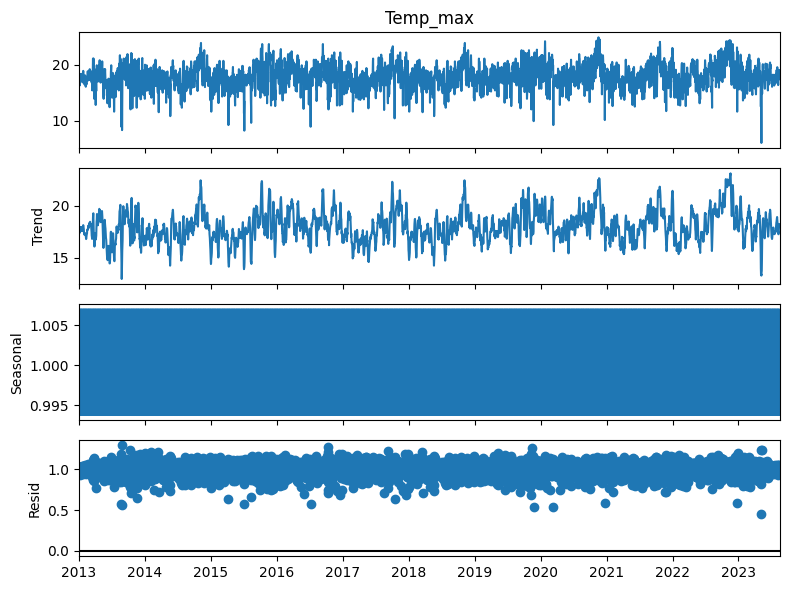

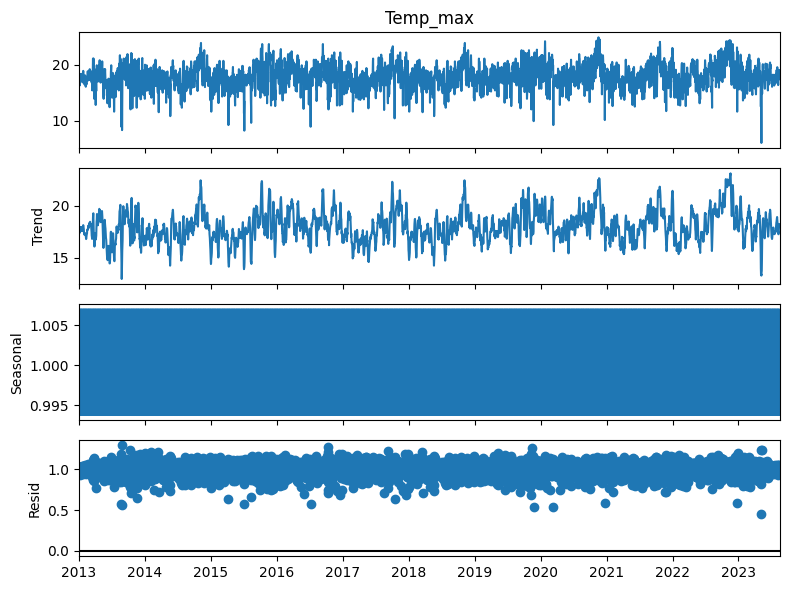

In [ ]:
des_mul = sm.tsa.seasonal_decompose(df['Temp_max'], model='multiplicative', period=30)
des_mul.plot()

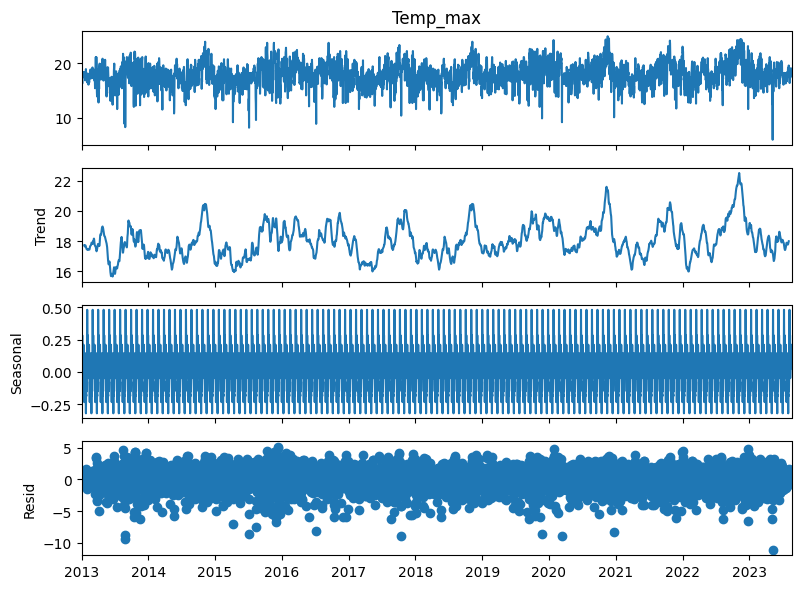

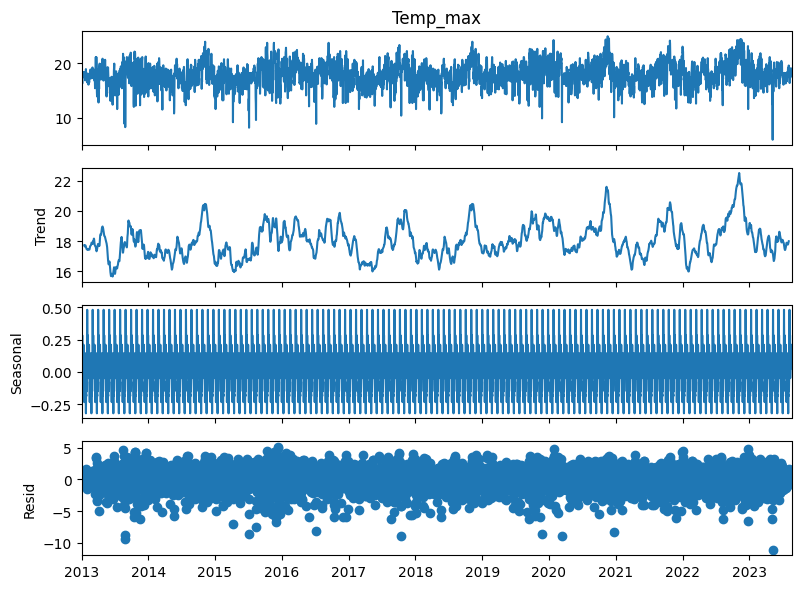

In [ ]:
des_add = sm.tsa.seasonal_decompose(df['Temp_max'], model='additive', period=30)
des_add.plot()

In [ ]:
  df_reconstructed = pd.concat([des_add.seasonal, des_add.trend, des_add.resid, des_add.observed], axis = 1)
df_reconstructed.columns = ['seasonal', 'trend', 'resid', 'actual_values']
df_reconstructed.head(3)

,seasonal,trend,resid,actual_values
Fecha,,,,
2013-01-01,0.004676,NaN,NaN,18.022
2013-01-02,0.016196,NaN,NaN,18.000
2013-01-03,-0.104044,NaN,NaN,17.822


In [ ]:
df_reconstructed = pd.concat([des_mul.seasonal, des_mul.trend, des_mul.resid, des_mul.observed], axis = 1)
df_reconstructed.columns = ['seasonal', 'trend', 'resid', 'actual_values']
df_reconstructed.head(3)

,seasonal,trend,resid,actual_values
Fecha,,,,
2013-01-01,1.000506,NaN,NaN,18.022
2013-01-02,1.000709,NaN,NaN,18.000
2013-01-03,0.993770,NaN,NaN,17.822


In [ ]:
# plt.plot(des_add.seasonal, label='Additive Seasonal')
# plt.legend()

### MOPVING AVERAGE
El MA ayuda a eliminar el ruido aleatorio de los datos, lo que facilita la visualización de las tendencias subyacentes.

In [ ]:
sma_window = 30  # 7-day moving average
sma = df['Temp_max'].rolling(window=sma_window).mean()

In [ ]:
ema_window = 30  # 30-day moving average
ema = df['Temp_max'].ewm(span=ema_window, adjust=False).mean()
ema

Fecha
2013-01-01    18.022000
2013-01-02    18.020581
2013-01-03    18.007769
2013-01-04    17.928429
2013-01-05    17.821240
                ...    
2023-08-15    17.859514
2023-08-16    17.936965
2023-08-17    17.981032
2023-08-18    17.971288
2023-08-19    17.997656
Name: Temp_max, Length: 3883, dtype: float64

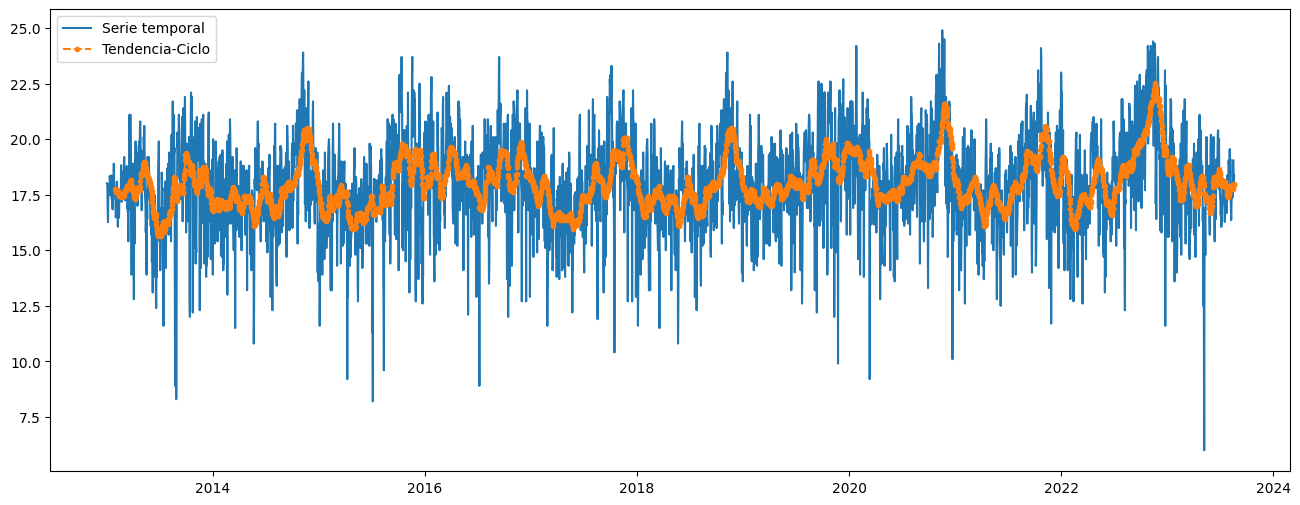

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(df['Temp_max'], label='Serie temporal')
plt.plot(sma, label='Tendencia-Ciclo', linestyle='--', marker='o', markersize=3)
# plt.plot(ema, label=f'{ema_window}-Day EMA')
plt.legend()

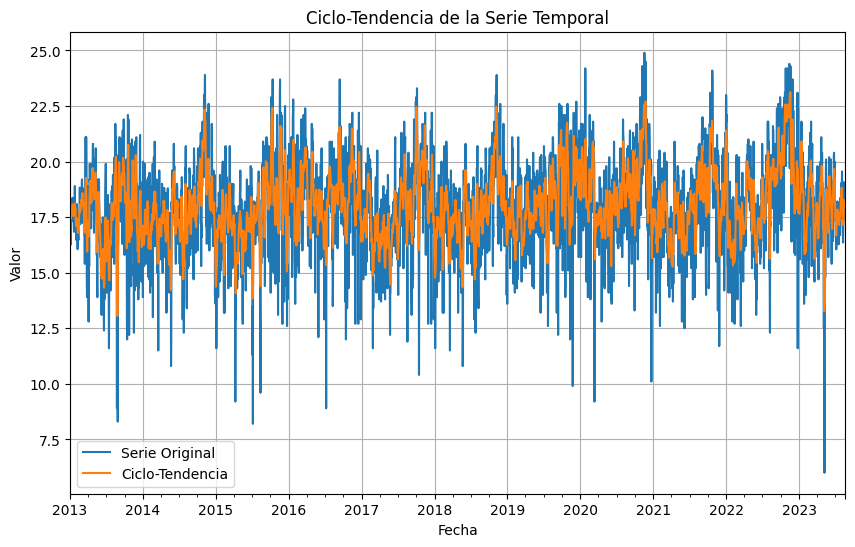

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
serie_temporal = df['Temp_max']
# Supongamos que 'serie_temporal' es tu serie de tiempo
# Descomposición de la serie temporal
res = seasonal_decompose(serie_temporal, model='additive')

# Obtención de la componente de ciclo-tendencia
ciclo_tendencia = res.trend + res.seasonal

# Creación de un DataFrame con la serie temporal original y la componente de ciclo-tendencia
df = pd.DataFrame({'Serie Original': serie_temporal, 'Ciclo-Tendencia': ciclo_tendencia})

# Graficar la serie temporal original y la componente de ciclo-tendencia
df.plot(figsize=(10, 6))
plt.title('Ciclo-Tendencia de la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

## AUTOCORRELATION

In [ ]:
# Carga de datos diarios
# location='/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING TESIS/TIME_SERIES-Andenes_Diario-13-23.csv'
location='/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING TESIS/TIME-SERIES-Diario-13-23.csv'
df= pd.read_csv(location, parse_dates=['Fecha'])
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)



In [ ]:
df = df.rename(columns={"Tｰ Media": "Temp_media", "TｰMaxima": "Temp_max", "TｰMinima": "Temp_min", "Lluvia": "Precipitacion", "%Humedad": "Humedad" })
df = df.drop(["Año", "Dia", "Mes", "Temp_media", "Temp_min", "Humedad", "Precipitacion"], axis=1) # TMAX DATAFRAME
df.head(2)

,Temp_max
Fecha,
2013-01-01,18.022
2013-01-02,18.000


In [ ]:
# Compute the daily change
data_diff = df.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_data = data_diff['Temp_max'].autocorr()
print("The autocorrelation of daily humidty percentage changes is %4.2f" %(autocorrelation_data))

# Convert the daily data to monthly data
monthly_data = df.resample(rule='M').last()

# Repeat above for monthly data
monthly_data = monthly_data.diff()
autocorrelation_monthly = monthly_data['Temp_max'].autocorr()
print("The autocorrelation of monthly humidty percentage changes is %4.2f" %(autocorrelation_monthly))

# Convert the daily data to annual data
yearly_data = df.resample(rule='A').last()

# Repeat above for annual data
yearly_data = yearly_data.diff()
autocorrelation_yearly = yearly_data['Temp_max'].autocorr()
print("The autocorrelation of annual humidty percentage changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily humidty percentage changes is -0.30
The autocorrelation of monthly humidty percentage changes is -0.46
The autocorrelation of annual humidty percentage changes is -0.74


In [ ]:
from pandas import read_csv
import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from rich import inspect
import matplotlib.pyplot as plt
import matplotlib as mpl
from itertools import cycle
import warnings

mpl.rcParams.update({"lines.linewidth": 1.2})
# Set max rows displayed for readability
pd.set_option("display.max_rows", 8)

# Set seed for random numbers
seed_for_prng = 78557
prng = np.random.default_rng(seed_for_prng)  # prng=probabilistic random number generator
# Turn off warnings
warnings.filterwarnings('ignore')

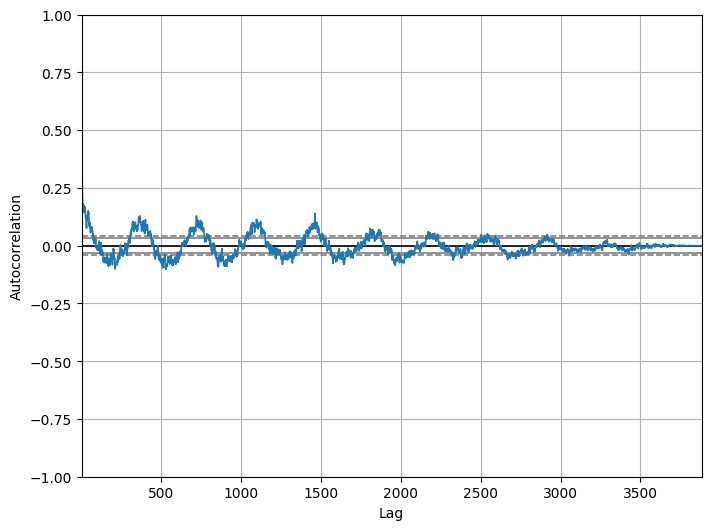

In [ ]:
autocorrelation_plot(df.Temp_max)
pyplot.show()

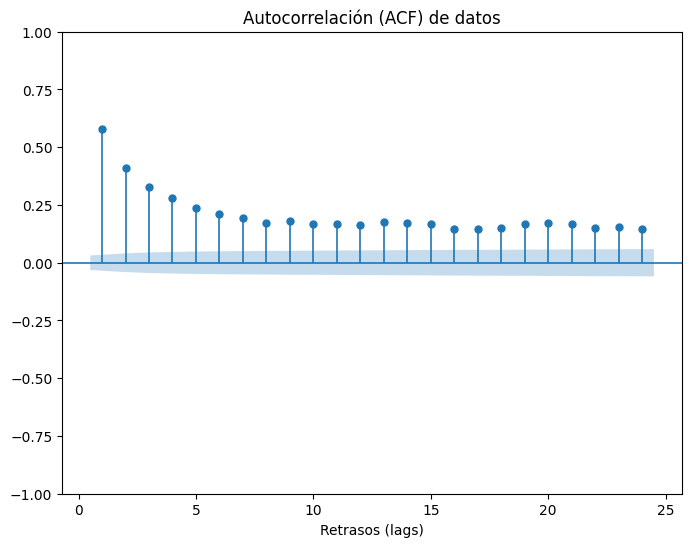

In [ ]:
fig = tsaplots.plot_acf(df["Temp_max"], lags=24, zero=False)
plt.title('Autocorrelación (ACF) de datos')
plt.xlabel('Retrasos (lags)')
plt.show()

autocorrelation can tell you about likely terms to include in a moving average (MA) model.

We can also look at the *partial autocorrelation*, which, at a given lag, is the correlation that results after removing the effect of any correlations due to the terms at shorter lags. It can be computer via the `statsmodels.tsa.stattools.pacf` function, but here's a chart:

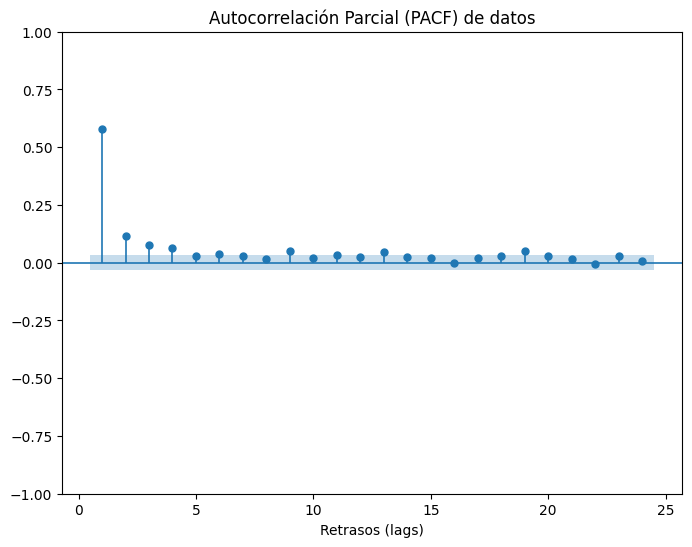

In [ ]:
fig = tsaplots.plot_pacf(df["Temp_max"], lags=24, zero=False)
plt.title('Autocorrelación Parcial (PACF) de datos')
plt.xlabel('Retrasos (lags)')
plt.show()

In [ ]:
## Realiza un preprocesamiento de una serie de datos para eliminar tendencias y prepararla para análisis posteriores ##
# Subtract the rolling mean
data_pre = df - df.rolling(50).mean()
# Drop the NaN values
data_pre = data_pre.dropna()

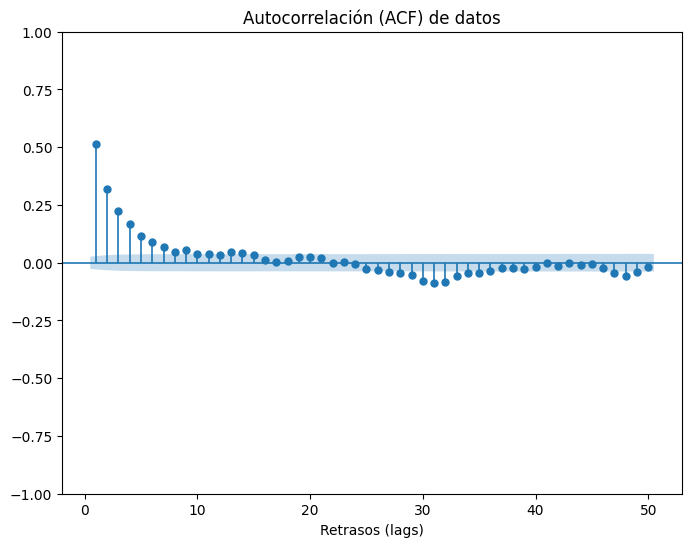

In [ ]:
fig, ax1 = plt.subplots()
# Plot the ACF
plot_acf(data_pre['Temp_max'], lags=50, ax=ax1, alpha=0.1, zero=False);
plt.title('Autocorrelación (ACF) de datos')
plt.xlabel('Retrasos (lags)')
plt.show()

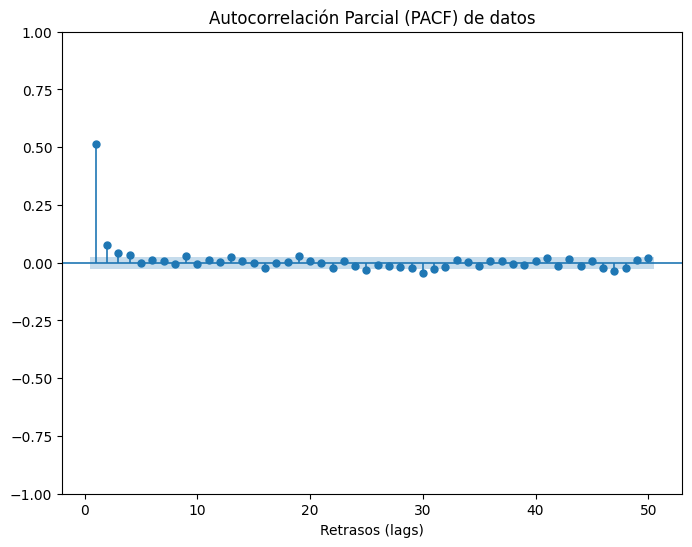

In [ ]:
fig, ax1 = plt.subplots()
# Plot the ACF
plot_pacf(data_pre['Temp_max'], lags=50, ax=ax1, alpha=0.1, zero=False)
plt.title('Autocorrelación Parcial (PACF) de datos')
plt.xlabel('Retrasos (lags)')
plt.show()

# TRANSFORMATIONS

In [ ]:
import pandas_datareader.data as web
from datetime import datetime

In [ ]:
df.head()

,Temp_max,Temp_min,Precipitacion,Humedad
Fecha,,,,
2013-01-01,18.022,7.344,0.956,73.676
2013-01-02,18.000,8.078,3.600,74.553
2013-01-03,17.822,7.667,9.933,76.719
2013-01-04,16.778,7.122,8.800,79.117
2013-01-05,16.267,7.211,4.956,79.746


In [ ]:
df["log"] = np.log(df["Temp_max"])
df["square"] = np.power(df["Temp_max"], 2)
df["sqrt"] = np.sqrt(df["Temp_max"])
df.head()

,Temp_max,Temp_min,Precipitacion,Humedad,log,square,sqrt
Fecha,,,,,,,
2013-01-01,18.022,7.344,0.956,73.676,2.891593,324.792484,4.245233
2013-01-02,18.000,8.078,3.600,74.553,2.890372,324.000000,4.242641
2013-01-03,17.822,7.667,9.933,76.719,2.880434,317.623684,4.221611
2013-01-04,16.778,7.122,8.800,79.117,2.820069,281.501284,4.096096
2013-01-05,16.267,7.211,4.956,79.746,2.789139,264.615289,4.033237


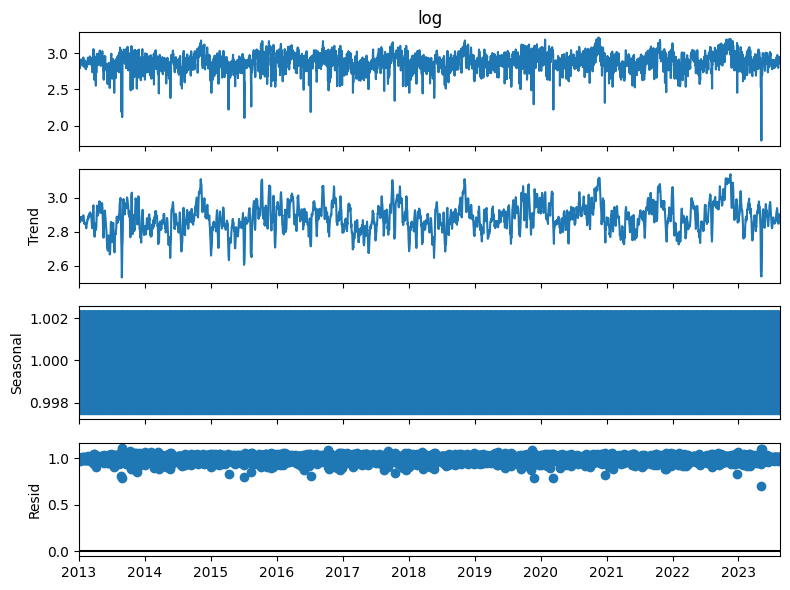

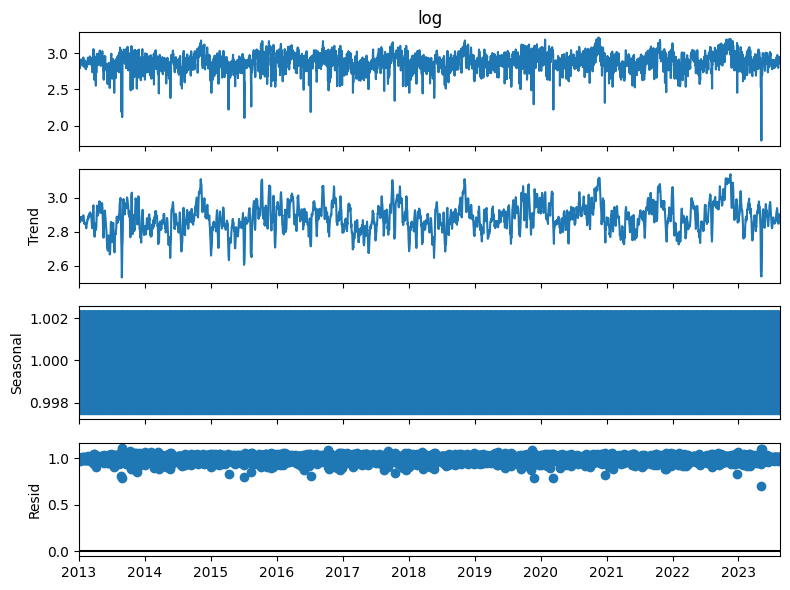

In [ ]:
des_mul = sm.tsa.seasonal_decompose(df["log"], model='multiplicative')
des_mul.plot()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress

In [ ]:
# Carga de datos diarios
# location='/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING TESIS/TIME_SERIES-Andenes_Diario-13-23.csv'
location='/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING TESIS/TIME-SERIES-Diario-13-23.csv'
df= pd.read_csv(location, parse_dates=['Fecha'])
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)

In [ ]:

df = df.rename(columns={"Tｰ Media": "Temp_media", "TｰMaxima": "Temp_max", "TｰMinima": "Temp_min", "Lluvia": "Precipitacion", "%Humedad": "Humedad" })
df = df.drop(["Año", "Dia", "Mes", "Temp_media", "Temp_min", "Humedad", "Precipitacion"], axis=1) # TMAX DATAFRAME
df.head(2)

,Temp_max
Fecha,
2013-01-01,18.022
2013-01-02,18.000


In [ ]:
shift_1 = df['Temp_max'].autocorr(lag=1)

In [ ]:
print(shift_1)

0.5788780694078078


It’s also important to note that the AFC becomes more unreliable as you increase your lag value.
**This is because you will compare fewer and fewer observations as you increase the lag value. A general guideline is that the total number of observations (T) should be at least 50, and the greatest lag value (k) should be less than or equal to T/k. Since I have a total of 60 observations, I will only consider the first 20 values of the AFC.**

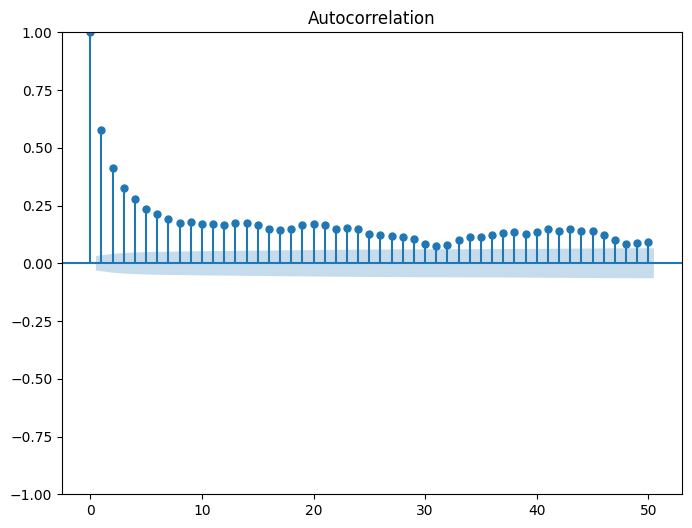

In [ ]:
plot_acf(df['Temp_max'], lags=50)
plt.show()

Perhaps they exhibit a stationary temperature profile day to day where the mean, variance, and autocorrelation are all constant (where autocorrelation is = 0).

Uncovering seasonality with autocorrelation in time series data


The ACF can also be used to uncover and verify seasonality in time series data. Let’s take a look at the water levels from the same dataset.

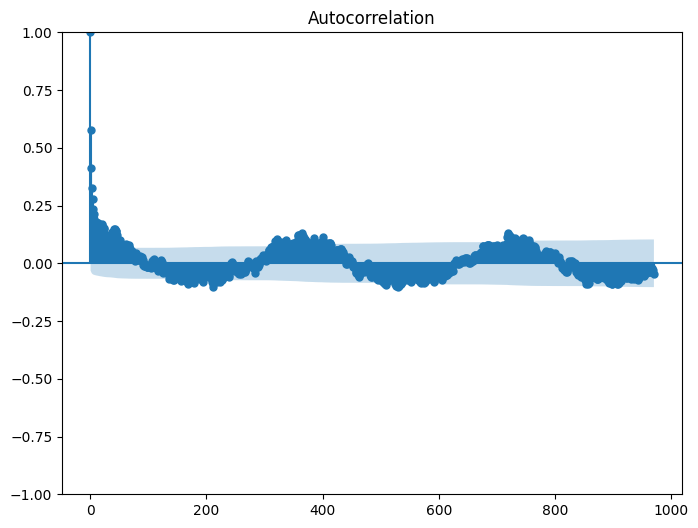

In [ ]:
plot_acf(df['Temp_max'], lags=970)
plt.show()